# Introducción al Deep Learning: fundamentos, arquitecturas y aplicaciones
## David de la Rosa de la Rosa (drrosa@ujaen.es)
## Manuel Germán Morales (mgerman@ujaen.es)

### Redes Neuronales: Introducción a la Inteligencia Artificial y Aprendizaje Profundo

Empezamos importando las librerías que utilizaremos en este notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('titanic.csv')
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Visualización

In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Este conjunto de datos tiene un total de 12 atributos:

1. PassengerID: ID del pasajero
2. Survived: indica si sobrevivió al accidente o no
3. Pclass (Passenger Class): indica la clase en la que iba el pasajero.
4. Name: nombre del pasajero
5. Sex: género masculino o femenino
6. Age: edad
7. SibSp: número de hermanos o esposas del pasajero que iban abordo
8. Parch: número de padres o hijos del pasajero que iban abordo
9. Ticket: el ID del ticket
10. Fare: cuánto pagó el pasajero
11. Cabin: id de la cabina del pasajero
12. Embarked: puerto de embarque (Cherbourg, Queenstown, Southampton)

Tenemos valores perdidos?

In [4]:
column_names = train_data.columns
for column in column_names:
    print(column + ' - ' + str(train_data[column].isnull().sum()))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2






Vamos a visualizar algunas columnas...





In [ ]:
train_data.Survived.value_counts()


,count
Survived,
0,549
1,342


Text(0, 0.5, 'Passenger Count')

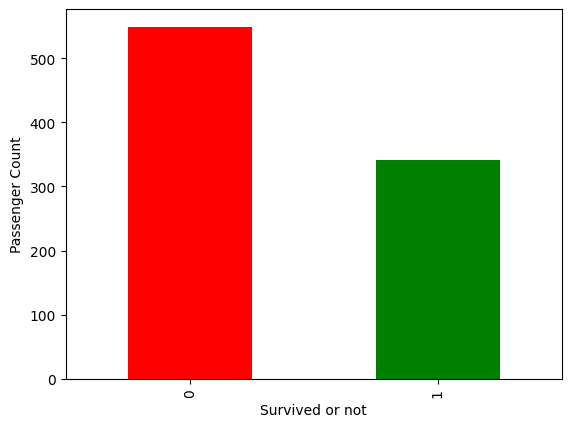

In [ ]:
plt = train_data.Survived.value_counts().plot(kind='bar', color=['red', 'green'])
plt.set_xlabel('Survived or not')
plt.set_ylabel('Passenger Count')

Cuántas personas hay viajando en cada clase?

In [ ]:
train_data[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


De cada clase, cuántos sobrevivieron?

In [ ]:
train_data[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


De cada clase, cuántos NO sobrevivieron?

In [ ]:
train_data[train_data['Survived'] == 0].groupby('Pclass').size()

,0
Pclass,
1,80
2,97
3,372


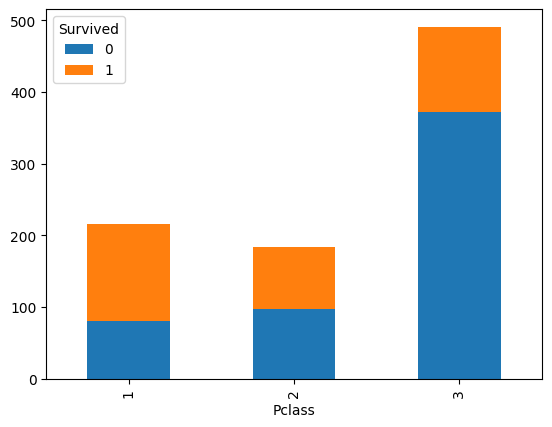

In [ ]:
survived_by_class = train_data.groupby('Pclass')['Survived'].value_counts().unstack()

survived_by_class.plot(kind='bar', stacked=True)
plt.set_xlabel('Clase')
plt.set_ylabel('Número de pasajeros')
plt.legend(['No sobrevivió', 'Sobrevivió'])

Probabilidad de supervivencia en base a la clase en la que viajaban?

Text(0, 0.5, 'Survival Probability')

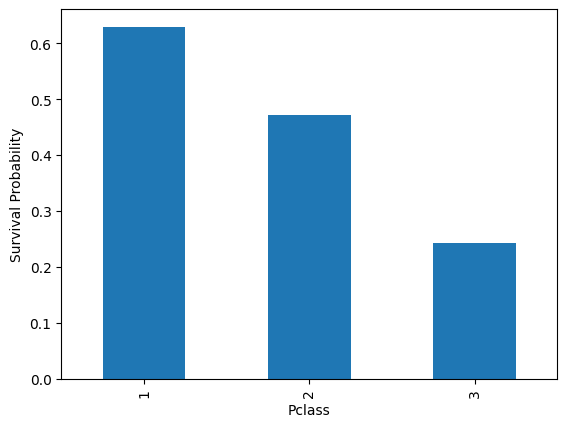

In [ ]:
plt = train_data[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

Distribución hombres y mujeres?

Text(0, 0.5, 'Passenger count')

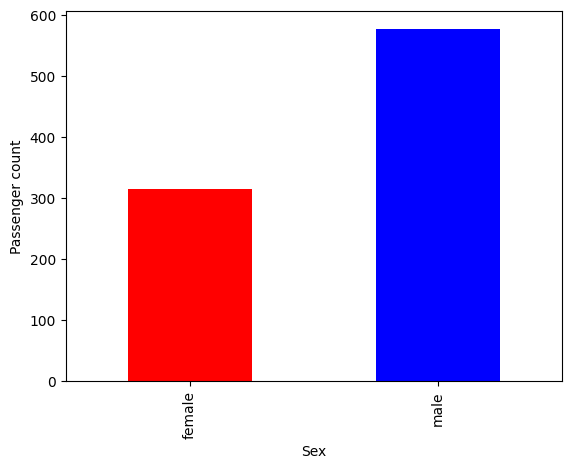

In [ ]:
plt = train_data.Sex.value_counts().sort_index().plot(kind='bar', color=['red', 'blue'])
plt.set_xlabel('Sex')
plt.set_ylabel('Passenger count')

Supervivencia de hombres y mujeres?

Text(0, 0.5, 'Survival Probability')

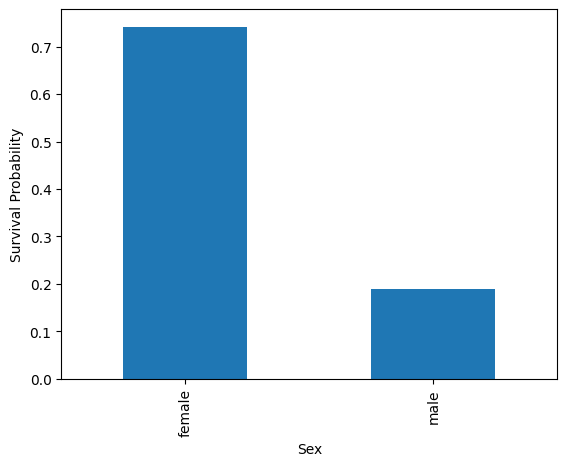

In [ ]:
plt = train_data[['Sex', 'Survived']].groupby('Sex').mean().Survived.plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')

... y podríamos seguir con cada columna del dataset

# Preprocesamiento


Qué tenemos hasta ahora?

*   PassengerID, Name y Ticket no influyen en si sobrevivió o no

*   Age y Embarked tienen pocos valores perdidos.

*   Cabin tiene muchos valores perdidos.

*   Hay valores numéricos y cadenas de texto

*   Hay algo de desabalanceo


Eliminamos las columnas que no necesitamos

In [5]:
train_data = train_data.drop(columns=['Ticket', 'PassengerId', 'Cabin', 'Name'])

In [6]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Transformamos las cadenas de texto a valores numéricos

In [7]:
import pandas as pd

# One-Hot Encoding para 'Sex' y 'Embarked'
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])

In [10]:
# Convertir las columnas dummies (las booleanas) a int
bool_cols = train_data.select_dtypes('bool').columns
train_data[bool_cols] = train_data[bool_cols].astype(int)

In [11]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0


Gestionamos los valores perdidos

In [ ]:
train_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


Hay solo dos valores perdidos en la columna Embarked. Podemos imputarlo con el valor más frecuente

Text(0, 0.5, 'Passenger Count')

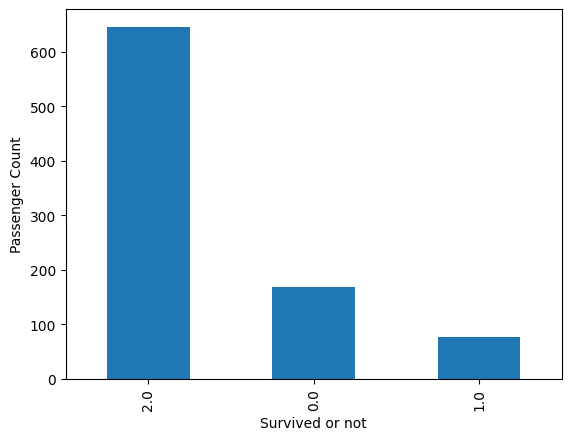

In [ ]:
plt = train_data.Embarked.value_counts().plot(kind='bar')
plt.set_xlabel('Survived or not')
plt.set_ylabel('Passenger Count')

In [ ]:
train_data['Embarked'] = train_data['Embarked'].fillna(2)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0


PREGUNTA: cómo podemos manejar los valores perdidos de la columna Age?

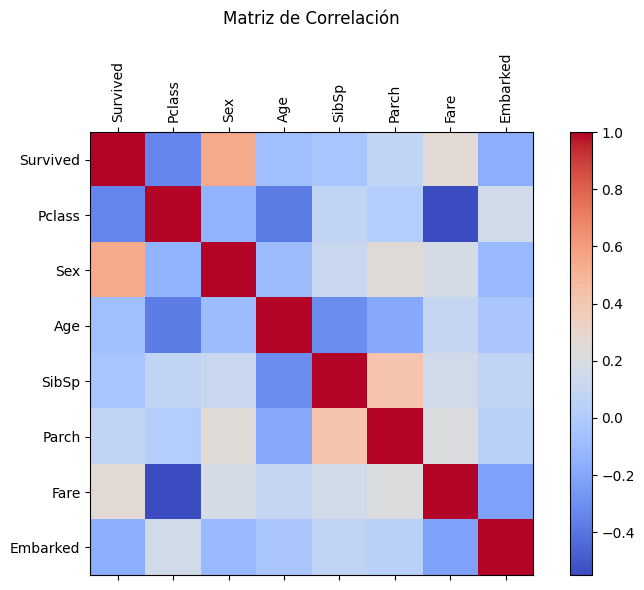

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

corr = train_data.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr, cmap='coolwarm')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
fig.colorbar(cax)
plt.title("Matriz de Correlación", pad=20)
plt.tight_layout()
plt.show()

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0


# Separar los datos en Train, Test y Validación

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Primero separamos train (80%) y test (20%)
train_full, test = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data['Survived'])

# Ahora separamos train_full en train (70%) y validación (10%)
train, val = train_test_split(train_full, test_size=0.125, random_state=42, stratify=train_full['Survived'])

# Tamaños aproximados:
print(f'Train: {len(train)}')
print(f'Validación: {len(val)}')
print(f'Test: {len(test)}')

Train: 623
Validación: 89
Test: 179


Con estos datos conseguiremos entrenar un modelo mucho mejor que si hubiéramos utilizado los datos en bruto.


Preprocessing for the win!!